# Natural Language Processing: an introduction

### Import dependencies

In [1]:
import numpy as np
import pandas as pd
import nltk
from gensim import corpora


%precision 4
np.set_printoptions(precision=4)

In [43]:
movies_df = pd.read_csv("../datasets/IMDB-Movie-Data.csv")
movies_df.sample(5)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
914,915,Notorious,"Biography,Crime,Drama",The life and death story of Notorious B.I.G. (...,George Tillman Jr.,"Jamal Woolard, Anthony Mackie, Derek Luke,Momo...",2009,122,6.7,33007,36.84,60.0
538,539,True Crimes,"Crime,Drama,Thriller",A murder investigation of a slain business man...,Alexandros Avranas,"Jim Carrey, Charlotte Gainsbourg, Marton Csoka...",2016,92,7.3,198,NaN,43.0
452,453,Pandorum,"Action,Horror,Mystery",A pair of crew members aboard a spaceship wake...,Christian Alvart,"Dennis Quaid, Ben Foster, Cam Gigandet, Antje ...",2009,108,6.8,126656,10.33,28.0
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
569,570,Money Monster,"Crime,Drama,Thriller",Financial TV host Lee Gates and his producer P...,Jodie Foster,"George Clooney, Julia Roberts, Jack O'Connell,...",2016,98,6.5,68654,41.01,55.0


In [3]:
movies_corpus = movies_df["Description"].tolist()
movies_corpus[:5]

['A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.',
 'Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.',
 'Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.',
 "In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same.",
 'A secret government agency recruits some of the most dangerous incarcerated super-villains to form a defensive task force. Their first mission: save the world from the apocalypse.']

### Tokenization

In [4]:
from nltk import word_tokenize

# download puntuation resources for NLTK
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/nick/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
word_tokens = word_tokenize(movies_corpus[0])
word_tokens

['A',
 'group',
 'of',
 'intergalactic',
 'criminals',
 'are',
 'forced',
 'to',
 'work',
 'together',
 'to',
 'stop',
 'a',
 'fanatical',
 'warrior',
 'from',
 'taking',
 'control',
 'of',
 'the',
 'universe',
 '.']

In [6]:
tokenized_corpus = [word_tokenize(doc) for doc in movies_corpus]
print(tokenized_corpus[100:103])

[['Identical', 'twin', 'gangsters', 'Ronald', 'and', 'Reginald', 'Kray', 'terrorize', 'London', 'during', 'the', '1960s', '.'], ['The', 'powerful', 'but', 'arrogant', 'god', 'Thor', 'is', 'cast', 'out', 'of', 'Asgard', 'to', 'live', 'amongst', 'humans', 'in', 'Midgard', '(', 'Earth', ')', ',', 'where', 'he', 'soon', 'becomes', 'one', 'of', 'their', 'finest', 'defenders', '.'], ['An', 'astronaut', 'becomes', 'stranded', 'on', 'Mars', 'after', 'his', 'team', 'assume', 'him', 'dead', ',', 'and', 'must', 'rely', 'on', 'his', 'ingenuity', 'to', 'find', 'a', 'way', 'to', 'signal', 'to', 'Earth', 'that', 'he', 'is', 'alive', '.']]


#### RegexpTokenizer

A better tokenizer to remove also all the punctuation

In [7]:
from string import punctuation

tokens = [tok for tok in word_tokenize(movies_corpus[0]) if tok not in punctuation]
print(tokens)

['A', 'group', 'of', 'intergalactic', 'criminals', 'are', 'forced', 'to', 'work', 'together', 'to', 'stop', 'a', 'fanatical', 'warrior', 'from', 'taking', 'control', 'of', 'the', 'universe']


In [8]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(movies_corpus[0])
print(tokens)

['A', 'group', 'of', 'intergalactic', 'criminals', 'are', 'forced', 'to', 'work', 'together', 'to', 'stop', 'a', 'fanatical', 'warrior', 'from', 'taking', 'control', 'of', 'the', 'universe']


In [9]:
tokenized_corpus = list(map(word_tokenize, movies_corpus))
print(tokenized_corpus[:5])

[['A', 'group', 'of', 'intergalactic', 'criminals', 'are', 'forced', 'to', 'work', 'together', 'to', 'stop', 'a', 'fanatical', 'warrior', 'from', 'taking', 'control', 'of', 'the', 'universe', '.'], ['Following', 'clues', 'to', 'the', 'origin', 'of', 'mankind', ',', 'a', 'team', 'finds', 'a', 'structure', 'on', 'a', 'distant', 'moon', ',', 'but', 'they', 'soon', 'realize', 'they', 'are', 'not', 'alone', '.'], ['Three', 'girls', 'are', 'kidnapped', 'by', 'a', 'man', 'with', 'a', 'diagnosed', '23', 'distinct', 'personalities', '.', 'They', 'must', 'try', 'to', 'escape', 'before', 'the', 'apparent', 'emergence', 'of', 'a', 'frightful', 'new', '24th', '.'], ['In', 'a', 'city', 'of', 'humanoid', 'animals', ',', 'a', 'hustling', 'theater', 'impresario', "'s", 'attempt', 'to', 'save', 'his', 'theater', 'with', 'a', 'singing', 'competition', 'becomes', 'grander', 'than', 'he', 'anticipates', 'even', 'as', 'its', 'finalists', "'", 'find', 'that', 'their', 'lives', 'will', 'never', 'be', 'the', '

### Stopwords removal

In [10]:
from nltk.corpus import stopwords

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/nick/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

You can already see that there is something potentially dangerous happening here. "Will" is a stopwords but as a token
it can mean many things. In a sentence such as "My will is strong.", "will" is not an auxiliary and shoud not be considered a stopword.

We'll ignore this for now.

In [13]:
stop_words = set(stopwords.words('english'))
 
word_tokens = word_tokenize(movies_corpus[0])
 
filtered_sentence = [tok for tok in word_tokens if not tok.lower() in stop_words]
filtered_sentence

['group',
 'intergalactic',
 'criminals',
 'forced',
 'work',
 'together',
 'stop',
 'fanatical',
 'warrior',
 'taking',
 'control',
 'universe',
 '.']

In [14]:
from typing import List

def remove_stopwords(doc_tokens: List[str]) -> List[str]:
    return [tok for tok in doc_tokens if not tok.lower() in stop_words]

remove_stopwords(word_tokenize(movies_corpus[0]))

['group',
 'intergalactic',
 'criminals',
 'forced',
 'work',
 'together',
 'stop',
 'fanatical',
 'warrior',
 'taking',
 'control',
 'universe',
 '.']

In [15]:
filtered_tokenized_corpus = [remove_stopwords(tokens) for tokens in tokenized_corpus]
print(filtered_tokenized_corpus[100:103])

[['Identical', 'twin', 'gangsters', 'Ronald', 'Reginald', 'Kray', 'terrorize', 'London', '1960s', '.'], ['powerful', 'arrogant', 'god', 'Thor', 'cast', 'Asgard', 'live', 'amongst', 'humans', 'Midgard', '(', 'Earth', ')', ',', 'soon', 'becomes', 'one', 'finest', 'defenders', '.'], ['astronaut', 'becomes', 'stranded', 'Mars', 'team', 'assume', 'dead', ',', 'must', 'rely', 'ingenuity', 'find', 'way', 'signal', 'Earth', 'alive', '.']]


### Lemmatization with Part-Of-Speech Tagging

In [19]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

# POS tagging
nltk.download('averaged_perceptron_tagger')
# Wordnet
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/nick/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/nick/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/nick/nltk_data...


True

### Part-of-speech Tagging

Part of Speech tagging means labelling words in a sentence as nouns, adjectives, verbs...etc. NLTK can also label by tense, count, and more. Here's a list of the tags, what they mean, and some examples:

```
POS tag list:

CC	coordinating conjunction
CD	cardinal digit
DT	determiner
EX	existential there (like: "there is" ... think of it like "there exists")
FW	foreign word
IN	preposition/subordinating conjunction
JJ	adjective	'big'
JJR	adjective, comparative	'bigger'
JJS	adjective, superlative	'biggest'
LS	list marker	1)
MD	modal	could, will
NN	noun, singular 'desk'
NNS	noun plural	'desks'
NNP	proper noun, singular	'Harrison'
NNPS	proper noun, plural	'Americans'
PDT	predeterminer	'all the kids'
POS	possessive ending	parent\'s
PRP	personal pronoun	I, he, she
PRP$	possessive pronoun	my, his, hers
RB	adverb	very, silently,
RBR	adverb, comparative	better
RBS	adverb, superlative	best
RP	particle	give up
TO	to	go 'to' the store.
UH	interjection	errrrrrrrm
VB	verb, base form	take
VBD	verb, past tense	took
VBG	verb, gerund/present participle	taking
VBN	verb, past participle	taken
VBP	verb, sing. present, non-3d	take
VBZ	verb, 3rd person sing. present	takes
WDT	wh-determiner	which
WP	wh-pronoun	who, what
WP$	possessive wh-pronoun	whose
WRB	wh-abverb	where, when
```

In [17]:
# Part-of-speech tagging
sentence_pos = pos_tag(filtered_tokenized_corpus[0])
print(sentence_pos)

[('group', 'NN'), ('intergalactic', 'JJ'), ('criminals', 'NNS'), ('forced', 'VBD'), ('work', 'NN'), ('together', 'RB'), ('stop', 'JJ'), ('fanatical', 'JJ'), ('warrior', 'NN'), ('taking', 'VBG'), ('control', 'NN'), ('universe', 'NN'), ('.', '.')]


### Lemmatization

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word.

The `WordNetLemmatizer` relies on the WordNet lexical database of English: https://wordnet.princeton.edu/ 

One major difference with stemming is that lemmatize takes a part of speech parameter, “pos” If not supplied, the default is “noun.”

In the context of the NLTK Lemmatization, the part of speech tags are pre-defined with shortcuts for the NLTK `WordNetLemmatizer` as below.

```
ADJ = "a"
ADJ_SAT = "s"
ADV = "r" 
NOUN = "n" 
VERB = "v"
```



In [41]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_doc = []

nltk.download('omw-1.4')

def get_lemmatizer_pos(nltk_tag: str):
        if nltk_tag.startswith('J'):
            return wordnet.ADJ
        elif nltk_tag.startswith('V'):
            return wordnet.VERB
        elif nltk_tag.startswith('N'):
            return wordnet.NOUN
        elif nltk_tag.startswith('R'):
            return wordnet.ADV
        else:          
            return wordnet.NOUN

for token, tag in sentence_pos:
    # get the part-of-speech
        pos = get_lemmatizer_pos(tag)

        lemmatized_doc.append(lemmatizer.lemmatize(token, pos))
print(lemmatized_doc)

['group', 'intergalactic', 'criminal', 'force', 'work', 'together', 'stop', 'fanatical', 'warrior', 'take', 'control', 'universe', '.']


[nltk_data] Downloading package omw-1.4 to /Users/nick/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Putting all together

In [21]:
class DocumentPreProcessor:
    
    def __init__(self):
        self._tokenizer = RegexpTokenizer(r'\w+')
        self._lemmatizer = WordNetLemmatizer()
    
    @staticmethod
    def _remove_stopwords(doc_tokens: List[str]) -> List[str]:
        return [tok for tok in doc_tokens if not tok.lower() in stop_words]

    @staticmethod
    def _get_lemmatizer_pos(nltk_tag: str):
        if nltk_tag.startswith('J'):
            return wordnet.ADJ
        if nltk_tag.startswith('V'):
            return wordnet.VERB
        if nltk_tag.startswith('N'):
            return wordnet.NOUN
        if nltk_tag.startswith('R'):
            return wordnet.ADV          
        return wordnet.NOUN
    
    def preprocess(self, doc: str) -> List[str]:
        # tokenize
        tokenized_doc: List[str] = self._tokenizer.tokenize(doc)# remove stop words (optional)
        # unstopped_doc: str = self._remove_stopwords(doc)
        # print(unstopped_doc)
        # remove stop words (optional)
        filtered_tokens: str = self._remove_stopwords(tokenized_doc)
        # print(filtered_tokens)
        lemmatized_doc: List[str] = []
        for token, tag in pos_tag(filtered_tokens):
            pos = self._get_lemmatizer_pos(tag)
            
            # lemmatize based on POS
            lemmatized_doc.append(self._lemmatizer.lemmatize(token, pos))
            
        return lemmatized_doc

In [22]:
pre_processor = DocumentPreProcessor()

In [23]:
pre_processor.preprocess(movies_corpus[0])

['group',
 'intergalactic',
 'criminal',
 'force',
 'work',
 'together',
 'stop',
 'fanatical',
 'warrior',
 'take',
 'control',
 'universe']

In [24]:
pre_processed_corpus = list(map(pre_processor.preprocess, movies_corpus))

### Bag-of-words

Now we need to create a corpora Dictionary

In [25]:
# fit the dictionary on your corpus
dictionary = corpora.Dictionary(pre_processed_corpus)

In [26]:
movies_corpus_bow = [dictionary.doc2bow(doc_tokens) for doc_tokens in pre_processed_corpus]

In [27]:
print(movies_corpus_bow[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]


In [28]:
print([(dictionary[idx], bow_count) for idx, bow_count in movies_corpus_bow[0]])

[('control', 1), ('criminal', 1), ('fanatical', 1), ('force', 1), ('group', 1), ('intergalactic', 1), ('stop', 1), ('take', 1), ('together', 1), ('universe', 1), ('warrior', 1), ('work', 1)]


In [29]:
print(dictionary.token2id)

{'control': 0, 'criminal': 1, 'fanatical': 2, 'force': 3, 'group': 4, 'intergalactic': 5, 'stop': 6, 'take': 7, 'together': 8, 'universe': 9, 'warrior': 10, 'work': 11, 'Following': 12, 'alone': 13, 'clue': 14, 'distant': 15, 'find': 16, 'mankind': 17, 'moon': 18, 'origin': 19, 'realize': 20, 'soon': 21, 'structure': 22, 'team': 23, '23': 24, '24th': 25, 'Three': 26, 'apparent': 27, 'diagnose': 28, 'distinct': 29, 'emergence': 30, 'escape': 31, 'frightful': 32, 'girl': 33, 'kidnap': 34, 'man': 35, 'must': 36, 'new': 37, 'personality': 38, 'try': 39, 'animal': 40, 'anticipates': 41, 'attempt': 42, 'become': 43, 'city': 44, 'competition': 45, 'even': 46, 'finalist': 47, 'grander': 48, 'humanoid': 49, 'hustle': 50, 'impresario': 51, 'live': 52, 'never': 53, 'save': 54, 'sing': 55, 'theater': 56, 'agency': 57, 'apocalypse': 58, 'dangerous': 59, 'defensive': 60, 'first': 61, 'form': 62, 'government': 63, 'incarcerate': 64, 'mission': 65, 'recruit': 66, 'secret': 67, 'super': 68, 'task': 69,

### TF-IDF

Formula (from redacteur.com)

<img src="https://miro.medium.com/max/1400/1*ruCawEw0--m2SeHmAQooJQ.jpeg" alt="Drawing" style="height: 200px;"/>

In [30]:
from gensim.models import TfidfModel

In [31]:
tfidf_model = TfidfModel(movies_corpus_bow) 

In [32]:
[(dictionary[idx], tfidf_score) for idx, tfidf_score in tfidf_model[movies_corpus_bow[0]]]

[('control', 0.3073),
 ('criminal', 0.2898),
 ('fanatical', 0.4609),
 ('force', 0.1888),
 ('group', 0.2040),
 ('intergalactic', 0.3684),
 ('stop', 0.2488),
 ('take', 0.1737),
 ('together', 0.2362),
 ('universe', 0.3413),
 ('warrior', 0.2951),
 ('work', 0.2115)]

Let's now apply our TF-IDF model to our whole corpus

In [33]:
movies_corpus_tfidf = tfidf_model[movies_corpus_bow]

### Latent Semantic Analysis

Latent semantic indexing (LSI) is an indexing and retrieval method that uses a mathematical technique called singular value decomposition (SVD) to identify patterns in the relationships between the terms and concepts contained in an unstructured collection of text. 

LSI is based on the principle that words that are used in the same contexts tend to have similar meanings. A key feature of LSI is its ability to extract the conceptual content of a body of text by establishing associations between those terms that occur in similar contexts.

In [34]:
from gensim.models import LsiModel

In [35]:
lsi_model = LsiModel(movies_corpus_tfidf, id2word=dictionary, num_topics=9)
movies_corpus_lsi = lsi_model[movies_corpus_tfidf]

In [36]:
lsi_model.show_topics()

[(0,
  '-0.192*"young" + -0.165*"life" + -0.151*"woman" + -0.140*"find" + -0.131*"man" + -0.120*"love" + -0.119*"friend" + -0.119*"girl" + -0.117*"new" + -0.116*"family"'),
 (1,
  '-0.313*"woman" + -0.280*"young" + -0.195*"love" + -0.153*"man" + -0.146*"fall" + 0.142*"high" + 0.135*"agent" + 0.129*"world" + 0.124*"save" + 0.123*"team"'),
 (2,
  '-0.380*"school" + -0.320*"high" + -0.174*"party" + -0.152*"friend" + 0.133*"man" + -0.128*"girl" + 0.122*"young" + -0.120*"student" + -0.104*"best" + -0.100*"night"'),
 (3,
  '-0.345*"New" + -0.334*"York" + -0.241*"City" + -0.229*"group" + 0.170*"year" + 0.152*"school" + -0.145*"go" + -0.136*"love" + -0.136*"relationship" + 0.134*"high"'),
 (4,
  '0.193*"school" + 0.179*"high" + 0.170*"woman" + -0.168*"try" + 0.156*"town" + -0.153*"wife" + 0.147*"small" + 0.143*"force" + 0.140*"world" + 0.139*"group"'),
 (5,
  '0.200*"woman" + 0.197*"drug" + 0.174*"agent" + -0.165*"new" + 0.151*"CIA" + 0.138*"young" + 0.136*"high" + -0.125*"friend" + -0.113*"mu

#### Display the result of Topic Modelling

In [37]:
lsi_model.get_topics().shape

(9, 5342)

In [38]:
# Number of top words per topic
num_words = 10

topic_words = pd.DataFrame()

for idx, topic in enumerate(lsi_model.get_topics()):
    # get the token ids of the "num_words" top words per topic
    # NB: numpy.argsort() returns the indices that would sort an array.
    top_feature_ids = topic.argsort()[-num_words:][::-1]
    # get the values corresponding to each word/token
    feature_values = topic[top_feature_ids]
    # get the actual token/word out of its id
    words = [dictionary[id_] for id_ in top_feature_ids]
    # put topic index, word/token, and value into a DataFrame
    topic_df = pd.DataFrame({
        "value": feature_values,
        "word": words,
        "topic": idx
    })
    topic_words = pd.concat([topic_words, topic_df], ignore_index=True)

topic_words.head()

,value,word,topic
0,-0.000367,wit,0
1,-0.000367,match,0
2,-0.000367,businessmen,0
3,-0.000367,fisherman,0
4,-0.000367,priceless,0


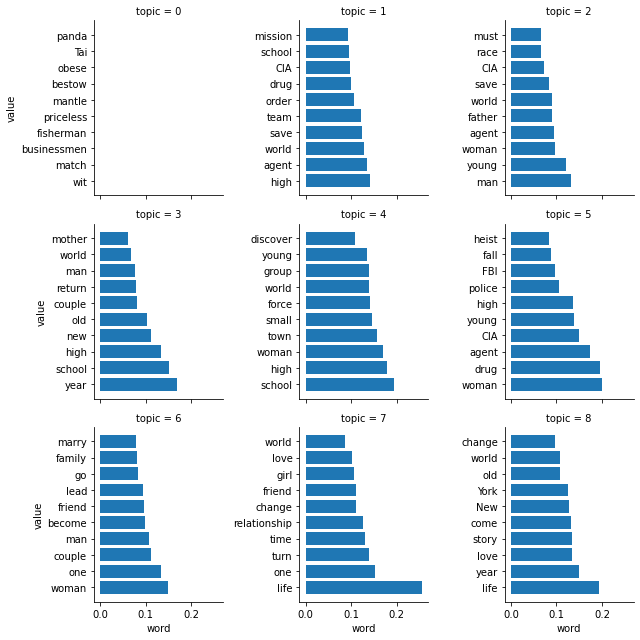

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

graph = sns.FacetGrid(topic_words, col="topic", col_wrap=3, sharey=False)
_ = graph.map(plt.barh, "word", "value")

In [40]:
%precision 2
print(movies_corpus_lsi[0])

[(0, -0.13068317514071814), (1, 0.08114353987058487), (2, 0.04434720395753852), (3, -0.09944855218336299), (4, 0.11871651316270207), (5, -0.015446760885912979), (6, -0.002555586790241245), (7, -0.025213520676830994), (8, 0.006295485250863906)]
